In [26]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.nn.functional as F

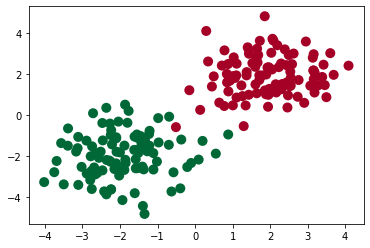

In [27]:
# 假数据
n_data = torch.ones(100, 2)         # 数据的基本形态
x0 = torch.normal(2*n_data, 1)      # 一类的所有数据都在x0,类型0 x data (tensor), shape=(100, 2)
y0 = torch.zeros(100)               # 标签，类型0 y data (tensor), shape=(100, )
x1 = torch.normal(-2*n_data, 1)     # 类型1 x data (tensor), shape=(100, 1)
y1 = torch.ones(100)                # 类型1 y data (tensor), shape=(100, )

# 注意 x, y 数据的数据形式是一定要像下面一样 (torch.cat 是在合并数据)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)  # FloatTensor = 32-bit floating
y = torch.cat((y0, y1),).type(torch.LongTensor)    # LongTensor = 64-bit integer

# The code below is deprecated in Pytorch 0.4. Now, autograd directly supports tensors
x, y = Variable(x), Variable(y)
# 画图
plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()

In [28]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.out = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.out(x)
        return x

In [29]:
# 这个地方我们的数据X包括两个特征，一个是横坐标一个纵坐标，所以要设为2
net = Net(n_feature=2, n_hidden=10, n_output=2)     # define the network
# 输出【0，1】—— 认为分类为1（第1位的类型） 和【1，0】—— 认为分类为0（第0位的类型）
# 【0，0，1】—— 认为分类为2（第二位的那个类型）

print(net)  # net architecture

optimizer = torch.optim.SGD(net.parameters(), lr=0.02)
loss_func = torch.nn.CrossEntropyLoss()  # the target label is NOT an one-hotted

plt.ion()   # something about plotting
# 神经网络的输出是概率【0.2， 0.3， 0.7】 分为每一类的概率

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)


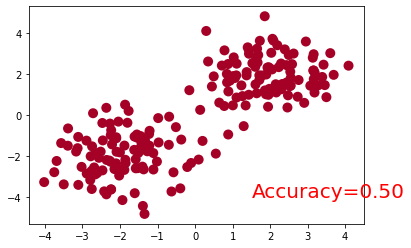

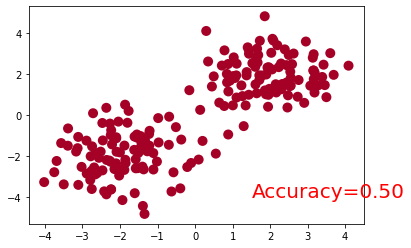

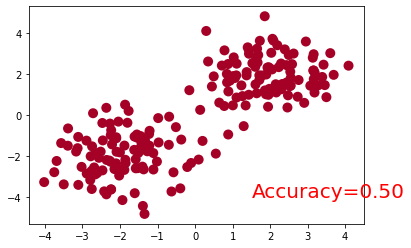

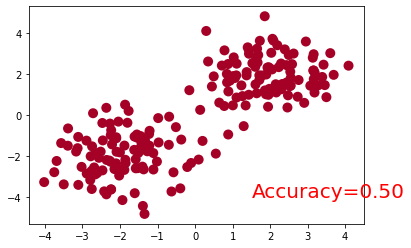

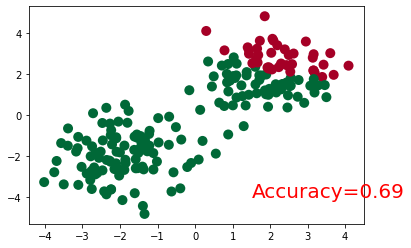

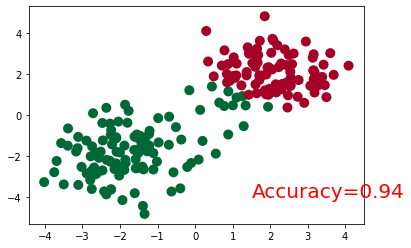

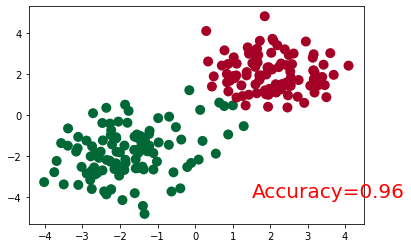

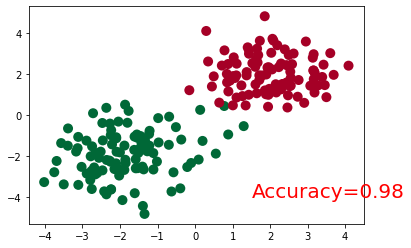

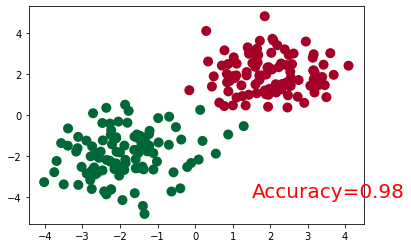

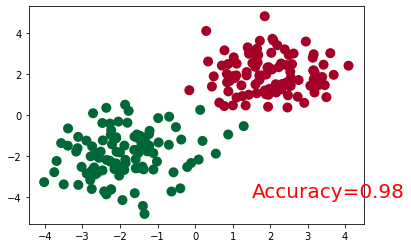

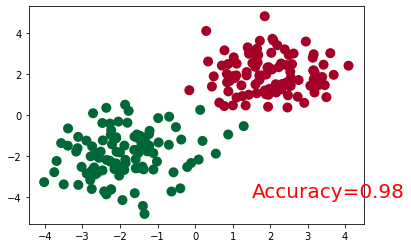

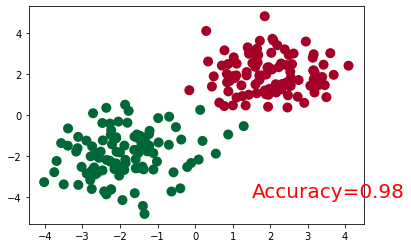

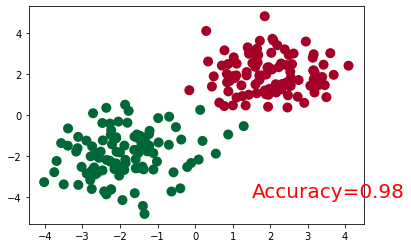

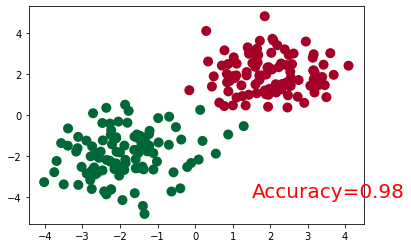

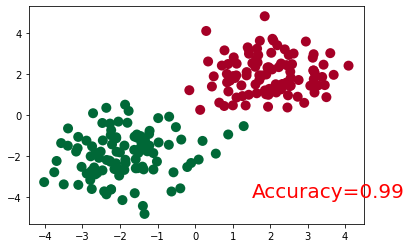

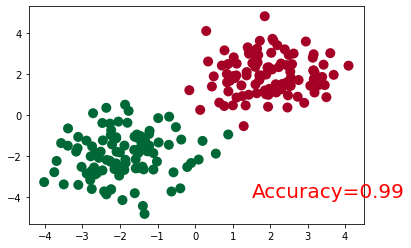

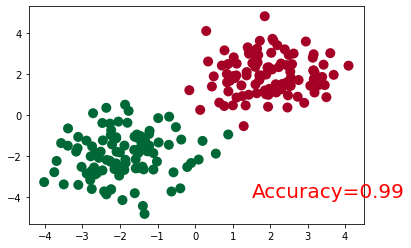

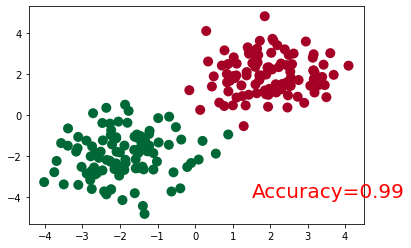

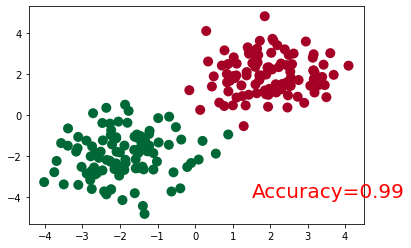

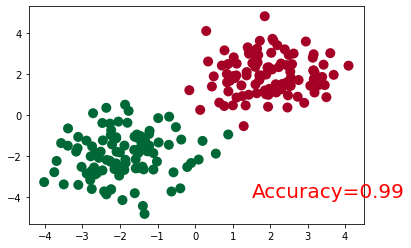

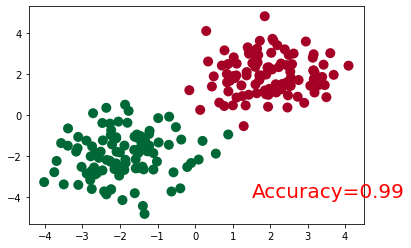

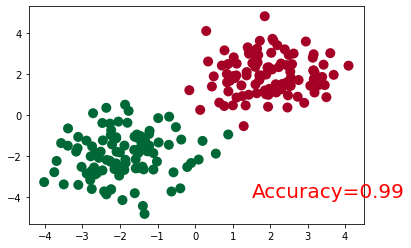

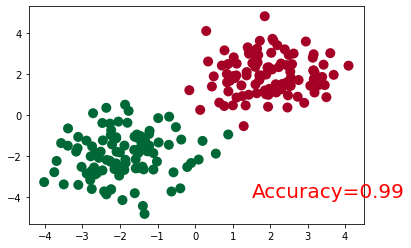

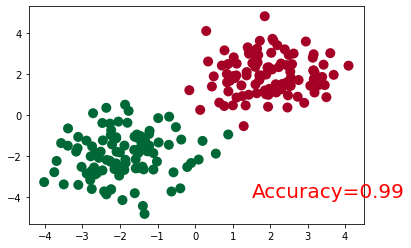

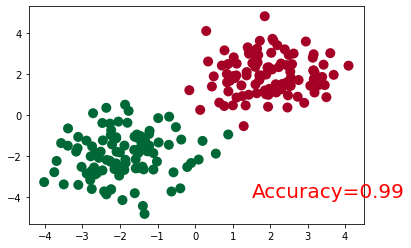

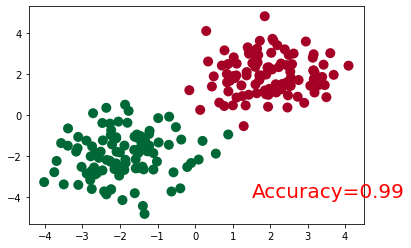

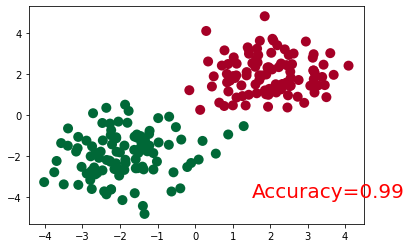

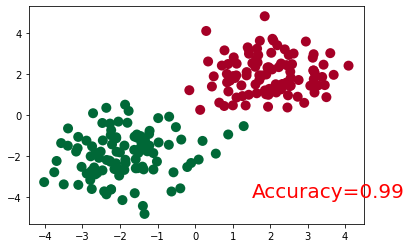

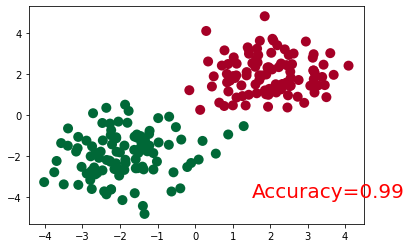

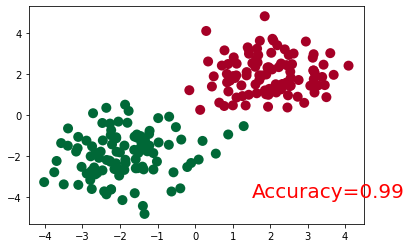

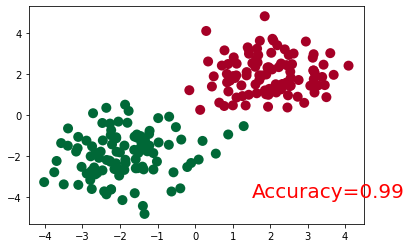

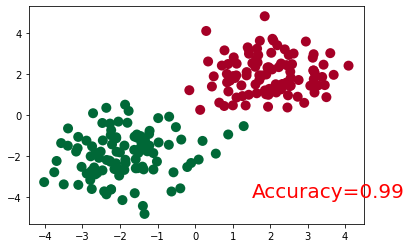

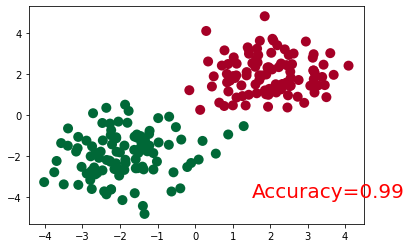

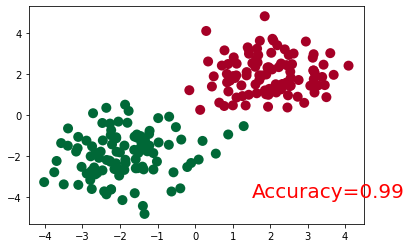

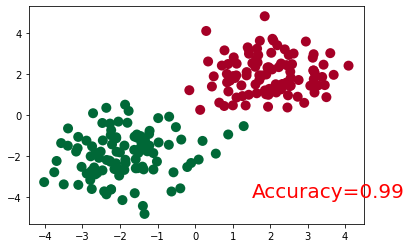

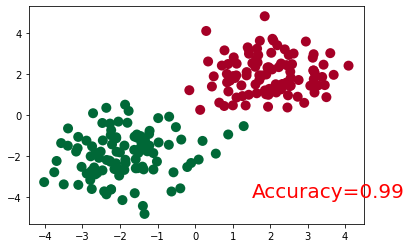

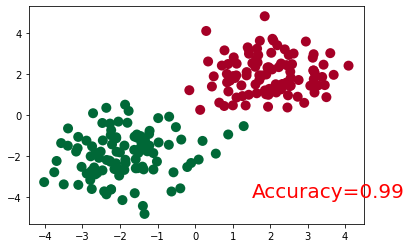

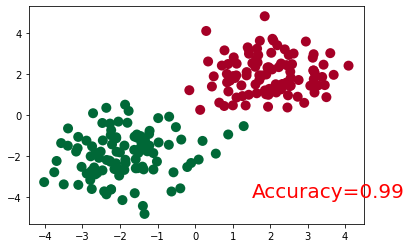

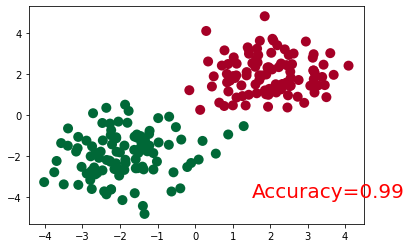

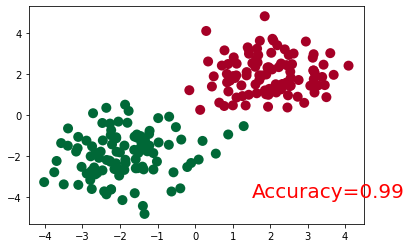

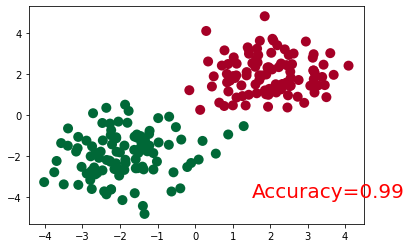

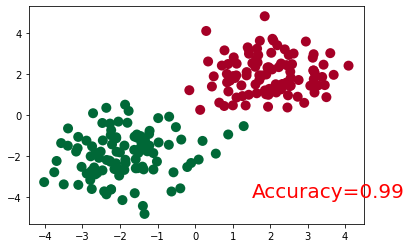

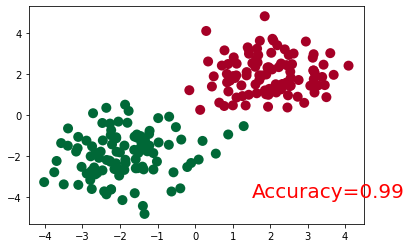

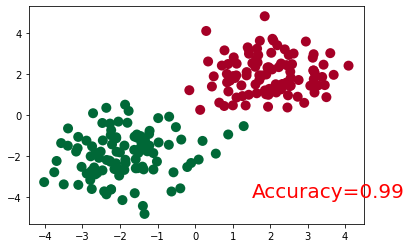

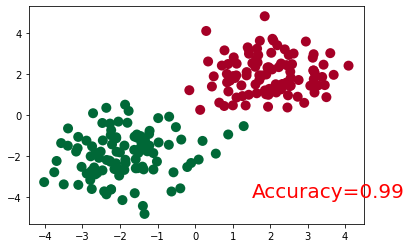

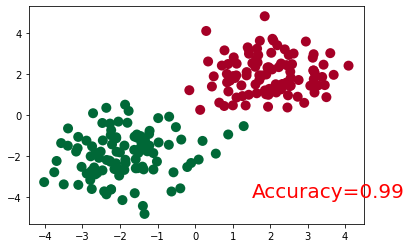

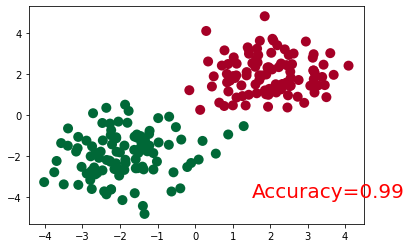

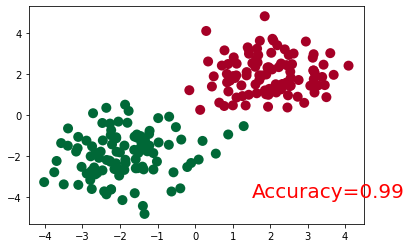

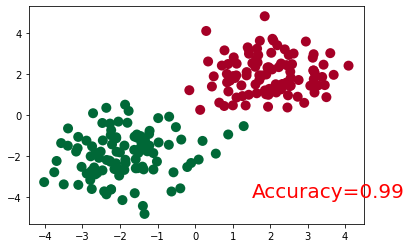

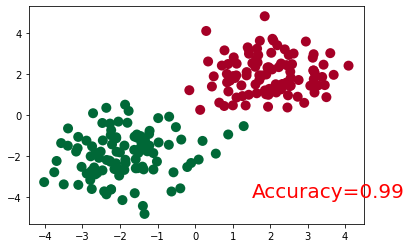

In [30]:
for t in range(100):
    out = net(x)                 # input x and predict based on x
    loss = loss_func(out, y)     # must be (1. nn output, 2. target), the target label is NOT one-hotted

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 2 == 0:
        # plot and show learning process
        plt.cla()
        prediction = torch.max(out, 1)[1]
        pred_y = prediction.data.numpy()
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()
plt.show()